# Combined Simulations

In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import os
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

filename = "/Users/jiahuili/PycharmProjects/GenAI_Customer/simulations_50it_multi_times_v2.csv"

df = pd.read_csv(filename)

df.head()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,capacity_gen_ai,creativity_gen_ai,learning_rate_customer,learning_rate_gen_ai,num_customers,num_products,num_retailers,percentage_willing_to_share_info,purchase_threshold,total_steps,...,mean_purchase_position (Willing),mean_purchase_position (Unwilling),creativity_gen_ai.1,AIC Linear (Sum),AIC Quadratic (Sum),AIC Quadratic (Minimum),AIC Cubic (Sum),AIC Quartic (Sum),AIC Quartic (Willing),AIC Quartic (Unwilling)
0,0.0,0.1,0.3,0.0,100,100,20,1,1.5,40,...,65.418500,0,0.1,-10.0,21.303858,-83.076887,18.530636,22.348792,22.348792,NaN
1,0.0,0.1,0.3,0.0,100,100,20,1,1.5,40,...,36.614833,0,0.1,-10.0,-149.477775,-205.012535,-174.326815,-191.820116,-191.820116,NaN
2,0.0,0.1,0.3,0.0,100,100,20,1,1.5,40,...,55.781500,0,0.1,-10.0,35.573806,-74.548577,26.813692,23.030912,23.030912,NaN
3,0.0,0.1,0.3,0.0,100,100,20,1,1.5,40,...,57.967667,0,0.1,-10.0,38.087910,-55.455938,38.405133,31.961294,31.961294,NaN
4,0.0,0.1,0.3,0.0,100,100,20,1,1.5,40,...,68.741667,0,0.1,-10.0,-23.713182,-78.997915,-39.033533,-53.818108,-53.818108,NaN


In [2]:
df.loc[df['capacity_gen_ai'] == 0, 'percentage_willing_to_share_info'] = 0

# df.loc[df['percentage_willing_to_share_info'] == 0, 'creativity_gen_ai'] = 0
# df.loc[df['percentage_willing_to_share_info'] == 0, 'learning_rate_gen_ai'] = 0

# select columns
df_select = df[['total_steps', 'Average Satisfaction', 'learning_rate_gen_ai', 'capacity_gen_ai','creativity_gen_ai', 'percentage_willing_to_share_info', 'num_customers', 'num_retailers', 'num_products','AIC Quartic (Sum)', 'AIC Quadratic (Minimum)', 'Average Seller Rating']]


df_select.replace([-np.inf, np.inf], np.nan, inplace=True)

df_select.dropna(inplace=True)

filtered_df = df_select[
    df_select['creativity_gen_ai'].isin([0.1, 0.5, 0.9]) &
    df_select['capacity_gen_ai'].isin([0, 0.1, 0.5, 0.9])&
    df_select['learning_rate_gen_ai'].isin([0, 0.2, 0.4, 0.6, 0.8])
]

/var/folders/lx/qwfk5l855bq3cnpg8br590200000gn/T/ipykernel_30852/3942070644.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select.replace([-np.inf, np.inf], np.nan, inplace=True)
/var/folders/lx/qwfk5l855bq3cnpg8br590200000gn/T/ipykernel_30852/3942070644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select.dropna(inplace=True)


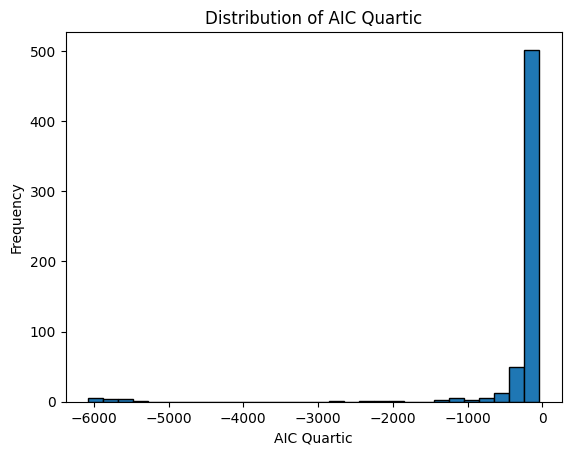

In [3]:
# Plotting the distribution of 'aic_quartic_original'
plt.hist(filtered_df['AIC Quadratic (Minimum)'], bins=30, edgecolor='k')
plt.xlabel('AIC Quartic')
plt.ylabel('Frequency')
plt.title('Distribution of AIC Quartic')
plt.show()


In [4]:
# Remove rows where 'aic_quartic_original' is less than -400
filtered_df = filtered_df[filtered_df['AIC Quadratic (Minimum)'] >= -370]

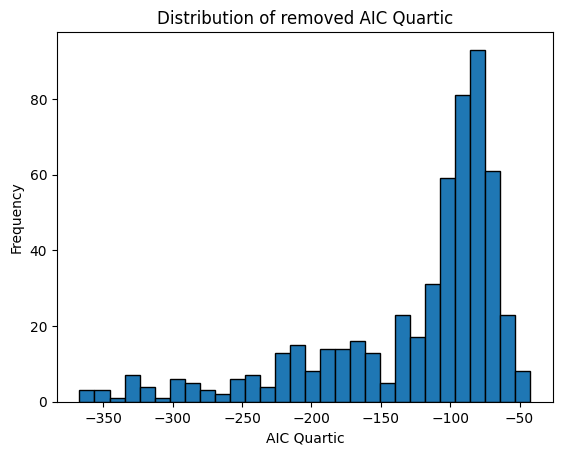

In [5]:
# Plotting the distribution of 'aic_quartic_original'
plt.hist(filtered_df['AIC Quadratic (Minimum)'], bins=30, edgecolor='k')
plt.xlabel('AIC Quartic')
plt.ylabel('Frequency')
plt.title('Distribution of removed AIC Quartic')
plt.show()

In [6]:
# Group the data by 'learning_rate_gen_ai', 'capacity_gen_ai', and 'creativity_gen_ai'
grouped_df_test = filtered_df.groupby(['capacity_gen_ai']).agg({
    'AIC Quartic (Sum)': 'mean',
    'AIC Quadratic (Minimum)': 'mean',
    'Average Satisfaction': 'mean',
    'Average Seller Rating': 'mean',
}).reset_index()

# Print the head of the grouped DataFrame to check the results
grouped_df_test.head()


,capacity_gen_ai,AIC Quartic (Sum),AIC Quadratic (Minimum),Average Satisfaction,Average Seller Rating
0,0.0,-60.837908,-119.756137,1.747425,13.906184
1,0.1,-47.929005,-110.981003,1.905126,15.483378
2,0.5,-68.799237,-130.249309,2.338268,19.623727
3,0.9,-92.663471,-144.439552,2.688182,23.498220


In [7]:
# Group the data by 'learning_rate_gen_ai', 'capacity_gen_ai', and 'creativity_gen_ai'
grouped_df_test = filtered_df.groupby(['creativity_gen_ai']).agg({
    'AIC Quartic (Sum)': 'mean',
    'AIC Quadratic (Minimum)': 'mean',
    'Average Satisfaction': 'mean',
    'Average Seller Rating': 'mean',
}).reset_index()

# Print the head of the grouped DataFrame to check the results
grouped_df_test.head()

,creativity_gen_ai,AIC Quartic (Sum),AIC Quadratic (Minimum),Average Satisfaction,Average Seller Rating
0,0.1,-65.212994,-122.238112,1.923912,15.693760
1,0.5,-65.555434,-126.898834,2.215443,18.521601
2,0.9,-70.069722,-128.852868,2.357793,20.029985


In [8]:
# Group the data by 'learning_rate_gen_ai', 'capacity_gen_ai', and 'creativity_gen_ai'
grouped_df_test_2 = filtered_df.groupby(['learning_rate_gen_ai']).agg({
    'AIC Quartic (Sum)': 'mean',
    'AIC Quadratic (Minimum)': 'mean',
    'Average Satisfaction': 'mean',
    'Average Seller Rating': 'mean',
}).reset_index()

# Print the head of the grouped DataFrame to check the results
grouped_df_test_2.head(50)

,learning_rate_gen_ai,AIC Quartic (Sum),AIC Quadratic (Minimum),Average Satisfaction,Average Seller Rating
0,0.0,-62.089629,-124.077032,2.040518,17.024394
1,0.2,-66.943433,-124.666457,2.136516,17.817093
2,0.4,-69.953072,-127.577728,2.251534,18.881251
3,0.6,-60.106863,-120.387153,2.075719,17.083175
4,0.8,-75.272437,-132.608361,2.292116,19.287459


In [9]:
# Group the data by 'learning_rate_gen_ai', 'capacity_gen_ai', and 'creativity_gen_ai'
grouped_df = filtered_df.groupby(['learning_rate_gen_ai', 'capacity_gen_ai', 'creativity_gen_ai']).agg({
    'AIC Quartic (Sum)': 'mean',
    'AIC Quadratic (Minimum)': 'mean',
    'Average Satisfaction': 'mean',
    'Average Seller Rating': 'mean',
    'total_steps': 'first',  # For other columns that do not change, we can simply take the first value
    'percentage_willing_to_share_info': 'first',
    'num_customers': 'first',
    'num_retailers': 'first',
    'num_products': 'first'
}).reset_index()

# Print the head of the grouped DataFrame to check the results
grouped_df.head(15)


,learning_rate_gen_ai,capacity_gen_ai,creativity_gen_ai,AIC Quartic (Sum),AIC Quadratic (Minimum),Average Satisfaction,Average Seller Rating,total_steps,percentage_willing_to_share_info,num_customers,num_retailers,num_products
0,0.0,0.0,0.1,-40.234242,-106.357231,1.238994,9.710521,40,0,100,20,100
1,0.0,0.0,0.5,-38.639279,-106.951729,1.953710,13.754121,40,0,100,20,100
2,0.0,0.0,0.9,-48.478152,-95.284565,1.877170,13.911704,40,0,100,20,100
3,0.0,0.1,0.1,-18.008746,-91.475987,1.470293,10.939095,40,1,100,20,100
4,0.0,0.1,0.5,-51.842871,-106.676574,1.224106,10.232164,40,1,100,20,100
5,0.0,0.1,0.9,-40.623714,-98.329147,1.916859,15.660414,40,1,100,20,100
6,0.0,0.5,0.1,-51.168532,-121.374605,1.828100,14.106949,40,1,100,20,100
7,0.0,0.5,0.5,-64.780255,-129.304081,2.190366,19.000070,40,1,100,20,100
8,0.0,0.5,0.9,-52.803805,-118.817309,2.450044,21.333683,40,1,100,20,100
9,0.0,0.9,0.1,-71.891841,-138.005184,2.153761,18.939738,40,1,100,20,100


In [10]:
rows_to_duplicate = grouped_df[grouped_df['percentage_willing_to_share_info'] == 0]

duplicated_rows = pd.concat([rows_to_duplicate] * 5, ignore_index=True)

df_extended = pd.concat([grouped_df, duplicated_rows], ignore_index=True)


# Data Normalization

In [11]:
# select columns
data = df_extended[['Average Satisfaction', 'learning_rate_gen_ai', 'capacity_gen_ai','creativity_gen_ai', 'percentage_willing_to_share_info', 'num_customers', 'num_retailers', 'num_products','AIC Quartic (Sum)','AIC Quadratic (Minimum)', 'Average Seller Rating']]

original_aic_quartic = data['AIC Quadratic (Minimum)'].copy()

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

data_normalized = scaler.fit_transform(data)

# Apply Min-Max scaling to the specified columns
# This scales the data in these columns to a range between 0 and 1
data_normalized_df = pd.DataFrame(data_normalized, columns=data.columns)

data_normalized_df['AIC Quadratic (Minimum) Original'] = original_aic_quartic.reset_index(drop=True)

# Split learning_rate_gen_ai

In [12]:
# Determine the minimum and maximum values of the 'learning_rate_gen_ai' column
min_value = data_normalized_df['learning_rate_gen_ai'].min()
max_value = data_normalized_df['learning_rate_gen_ai'].max()

# Calculate the range for each segment (low, medium, high)
range_per_part = (max_value - min_value) / 3

# Define thresholds for low, medium, and high categories
low_threshold = min_value + range_per_part
medium_threshold = min_value + 2 * range_per_part

# Creating new columns for low, medium, and high learning rates
# Assigning 1 if the condition is true, else 0
data_normalized_df['Learning Rate Low'] = (data_normalized_df['learning_rate_gen_ai'] <= low_threshold).astype(int)
data_normalized_df['Learning Rate Medium'] = ((data_normalized_df['learning_rate_gen_ai'] > low_threshold) & (data_normalized_df['learning_rate_gen_ai'] <= medium_threshold)).astype(int)
data_normalized_df['Learning Rate High'] = (data_normalized_df['learning_rate_gen_ai'] > medium_threshold).astype(int)

# Split creativity_gen_ai

In [13]:
# Determine the minimum and maximum values of the 'creativity_gen_ai' column
min_creativity = data_normalized_df['creativity_gen_ai'].min()
max_creativity = data_normalized_df['creativity_gen_ai'].max()

# Calculate the range for each segment (low, medium, high) for 'creativity_gen_ai'
creativity_range_per_part = (max_creativity - min_creativity) / 3

# Define thresholds for low, medium, and high categories for 'creativity_gen_ai'
low_creativity_threshold = min_creativity + creativity_range_per_part
medium_creativity_threshold = min_creativity + 2 * creativity_range_per_part

# Creating new columns for low, medium, and high creativity rates
# Assigning 1 if the condition is true, else 0
data_normalized_df['Creativity Low'] = (data_normalized_df['creativity_gen_ai'] <= low_creativity_threshold).astype(int)
data_normalized_df['Creativity Medium'] = ((data_normalized_df['creativity_gen_ai'] > low_creativity_threshold) & (data_normalized_df['creativity_gen_ai'] <= medium_creativity_threshold)).astype(int)
data_normalized_df['Creativity High'] = (data_normalized_df['creativity_gen_ai'] > medium_creativity_threshold).astype(int)

# Split capacity_gen_ai

In [14]:
# Calculate minimum and maximum values of the 'capacity_gen_ai' column
min_capacity = data_normalized_df['capacity_gen_ai'].min()
max_capacity = data_normalized_df['capacity_gen_ai'].max()

# Calculate the range for each segment (low, medium, high) for 'capacity_gen_ai'
capacity_range_per_part = (max_capacity - min_capacity) / 3

# Define thresholds for low, medium, and high categories for 'capacity_gen_ai'
low_capacity_threshold = min_capacity + capacity_range_per_part
medium_capacity_threshold = min_capacity + 2 * capacity_range_per_part

# Creating new columns for low, medium, and high capacity rates
# Assigning 1 if the condition is true, else 0
data_normalized_df['Capacity Low'] = (data_normalized_df['capacity_gen_ai'] <= low_capacity_threshold).astype(int)
data_normalized_df['Capacity Medium'] = ((data_normalized_df['capacity_gen_ai'] > low_capacity_threshold) & (data_normalized_df['capacity_gen_ai'] <= medium_capacity_threshold)).astype(int)
data_normalized_df['Capacity High'] = (data_normalized_df['capacity_gen_ai'] > medium_capacity_threshold).astype(int)

In [15]:
# rename columns
data = data_normalized_df.rename(columns={
    'Average Satisfaction': 'avg_satisfaction',
    'Average Seller Rating': 'avg_rating',
    'learning_rate_gen_ai': 'gen_ai_learning_rate',
    'capacity_gen_ai': 'gen_ai_capacity',
    'creativity_gen_ai': 'gen_ai_creativity',
    'percentage_willing_to_share_info': 'implement_gen_ai',
    'num_customers': 'n_customer',
    'num_retailers': 'n_seller',
    'num_products': 'n_product',
    'AIC Quadratic (Minimum)': 'aic_quartic_min',
    'AIC Quartic (Sum)': 'aic_quartic_sum'
})

data.head(10)

,avg_satisfaction,gen_ai_learning_rate,gen_ai_capacity,gen_ai_creativity,implement_gen_ai,n_customer,n_seller,n_product,aic_quartic_sum,aic_quartic_min,...,AIC Quadratic (Minimum) Original,Learning Rate Low,Learning Rate Medium,Learning Rate High,Creativity Low,Creativity Medium,Creativity High,Capacity Low,Capacity Medium,Capacity High
0,0.006572,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.835943,0.808149,...,-106.357231,1,0,0,1,0,0,1,0,0
1,0.322078,0.0,0.000000,0.5,0.0,0.0,0.0,0.0,0.845683,0.803460,...,-106.951729,1,0,0,0,1,0,1,0,0
2,0.288290,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.785603,0.895476,...,-95.284565,1,0,0,0,0,1,1,0,0
3,0.108677,0.0,0.111111,0.0,1.0,0.0,0.0,0.0,0.971661,0.925514,...,-91.475987,1,0,0,1,0,0,1,0,0
4,0.000000,0.0,0.111111,0.5,1.0,0.0,0.0,0.0,0.765056,0.805630,...,-106.676574,1,0,0,0,1,0,1,0,0
5,0.305810,0.0,0.111111,1.0,1.0,0.0,0.0,0.0,0.833565,0.871464,...,-98.329147,1,0,0,0,0,1,1,0,0
6,0.266628,0.0,0.555556,0.0,1.0,0.0,0.0,0.0,0.769174,0.689710,...,-121.374605,1,0,0,1,0,0,0,1,0
7,0.426548,0.0,0.555556,0.5,1.0,0.0,0.0,0.0,0.686055,0.627172,...,-129.304081,1,0,0,0,1,0,0,1,0
8,0.541180,0.0,0.555556,1.0,1.0,0.0,0.0,0.0,0.759189,0.709879,...,-118.817309,1,0,0,0,0,1,0,1,0
9,0.410389,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.642629,0.558548,...,-138.005184,1,0,0,1,0,0,0,0,1


In [16]:
# Create the independent variables matrix (X) and dependent variable (y)
# X = data[['gen_ai_learning_rate', 'gen_ai_creativity','gen_ai_capacity', 'implement_gen_ai', 'n_customer', 'n_seller', 'n_product']]
X = data[['gen_ai_learning_rate', 'gen_ai_creativity','gen_ai_capacity', 'n_customer', 'n_seller', 'n_product']]

X = sm.add_constant(X)
y = data['avg_satisfaction']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# print model
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:       avg_satisfaction   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     61.89
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           5.50e-25
Time:                        13:13:13   Log-Likelihood:                 75.689
No. Observations:                 135   AIC:                            -143.4
Df Residuals:                     131   BIC:                            -131.8
Df Model:                           3                                         
Covariance Type:            nonrobust  

/Users/jiahuili/opt/anaconda3/envs/GenAI/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [17]:
# Create the independent variables matrix (X) and dependent variable (y)
# X = data[['gen_ai_learning_rate', 'gen_ai_creativity','gen_ai_capacity', 'implement_gen_ai', 'n_customer', 'n_seller', 'n_product']]
X = data[['gen_ai_learning_rate', 'gen_ai_creativity','gen_ai_capacity', 'n_customer', 'n_seller', 'n_product']]

X = sm.add_constant(X)
y = data['avg_rating']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# print model
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:             avg_rating   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     78.91
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           3.22e-29
Time:                        13:13:13   Log-Likelihood:                 87.091
No. Observations:                 135   AIC:                            -166.2
Df Residuals:                     131   BIC:                            -154.6
Df Model:                           3                                         
Covariance Type:            nonrobust  

/Users/jiahuili/opt/anaconda3/envs/GenAI/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [18]:
# Selecting the independent variables/features for the model
# X = data[['gen_ai_learning_rate', 'gen_ai_creativity','gen_ai_capacity', 'implement_gen_ai', 'n_customer', 'n_seller', 'n_product']]
X = data[['gen_ai_learning_rate', 'gen_ai_creativity','gen_ai_capacity', 'n_customer', 'n_seller', 'n_product']]
# Adding a constant to the model (intercept)
X = sm.add_constant(X)
# Selecting the dependent variable/target
y = data['aic_quartic_min']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# print model
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:        aic_quartic_min   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     16.26
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           4.84e-09
Time:                        13:13:13   Log-Likelihood:                 70.172
No. Observations:                 135   AIC:                            -132.3
Df Residuals:                     131   BIC:                            -120.7
Df Model:                           3                                         
Covariance Type:            nonrobust  

/Users/jiahuili/opt/anaconda3/envs/GenAI/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


# Interaction Effects of AIC, Gen AI Capacity and Gen AI Learning Rate

In [19]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

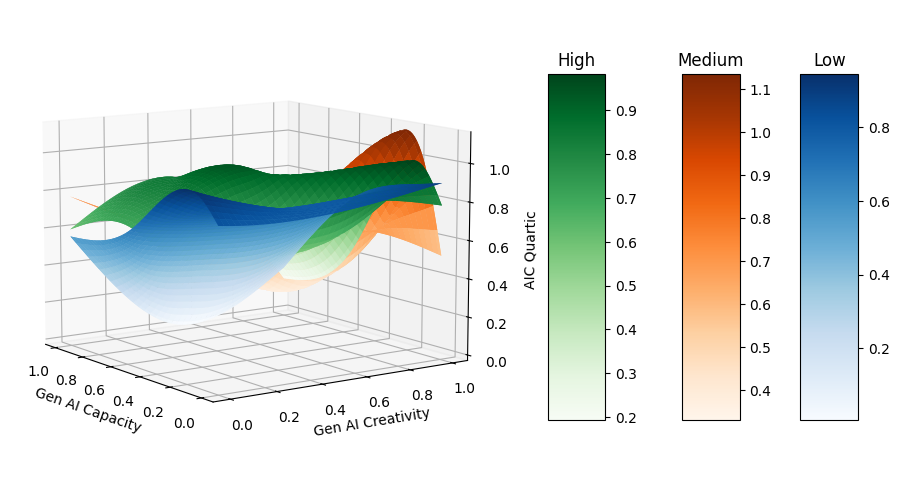

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import matplotlib.lines as mlines

fig = plt.figure(figsize=(12, 9)) 
ax = fig.add_subplot(111, projection='3d')

cmaps = ['Blues', 'Oranges', 'Greens'] # Different color maps for each category

# Loop through each learning rate condition
for i, rate in enumerate(['Learning Rate Low', 'Learning Rate Medium', 'Learning Rate High']):
    # Filtering data based on the learning rate
    subset = data[data[rate] == 1]

    # Extracting data for the axes
    x = subset['gen_ai_capacity']
    y = subset['gen_ai_creativity']
    z = subset['aic_quartic_min']

    # Creating a grid to interpolate
    xi = np.linspace(x.min(), x.max(), 80)
    yi = np.linspace(y.min(), y.max(), 80)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((x, y), z, (xi, yi), method='cubic')

    # Plotting the surface for each subset
    surf = ax.plot_surface(xi, yi, zi, cmap=cmaps[i], edgecolor='none')

    # Plotting the surface for each subset
    surf = ax.plot_surface(xi, yi, zi, cmap=cmaps[i], edgecolor='none')

    # Adding a color bar for each surface and setting a title for it
    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=6, pad=0.05*i)
    cbar.ax.set_title(rate.split()[2])  # Set title for each color bar

ax.view_init(elev=10, azim=-35)


# Setting labels for each axis
ax.set_xlabel('Gen AI Capacity')
ax.set_ylabel('Gen AI Creativity')
ax.set_zlabel('AIC Quartic')

# Inverting X axes
ax.set_xlim(ax.get_xlim()[::-1])

plt.show()


# Interaction Effects of Customer Satisfaction, Gen AI Capacity and Gen AI Learning Rate

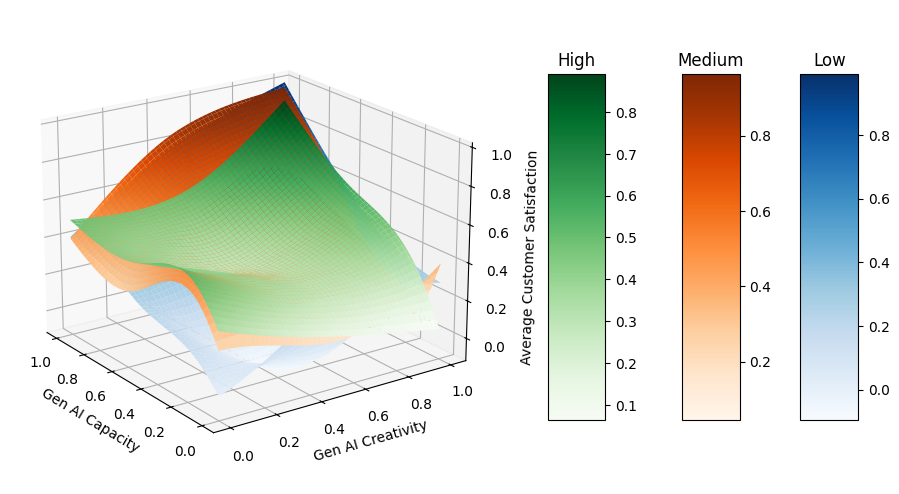

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import matplotlib.lines as mlines

fig = plt.figure(figsize=(12, 9)) 
ax = fig.add_subplot(111, projection='3d')

cmaps = ['Blues', 'Oranges', 'Greens']  # Different color maps for each category
rates = ['Learning Rate Low', 'Learning Rate Medium', 'Learning Rate High']  # Learning rate conditions

for i, rate in enumerate(rates):
    # Filtering data based on the learning rate
    subset = data[data[rate] == 1]

    # Extracting data for the axes
    x = subset['gen_ai_capacity']
    y = subset['gen_ai_creativity']
    z = subset['avg_satisfaction']

    # Creating a grid to interpolate
    xi = np.linspace(x.min(), x.max(), 100)
    yi = np.linspace(y.min(), y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((x, y), z, (xi, yi), method='cubic')

    # Plotting the surface for each subset
    surf = ax.plot_surface(xi, yi, zi, cmap=cmaps[i], edgecolor='none')

    # Adding a color bar for each surface and setting a title for it
    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=6, pad=0.05*i)
    cbar.ax.set_title(rate.split()[2])  # Set title for each color bar

ax.view_init(elev=20, azim=-35)

# Setting labels for each axis
ax.set_xlabel('Gen AI Capacity')
ax.set_ylabel('Gen AI Creativity')
ax.set_zlabel('Average Customer Satisfaction')

# Inverting X axes
ax.set_xlim(ax.get_xlim()[::-1])

plt.show()


# Interaction Effects of Seller Rating, Gen AI Capacity and Gen AI Learning Rate

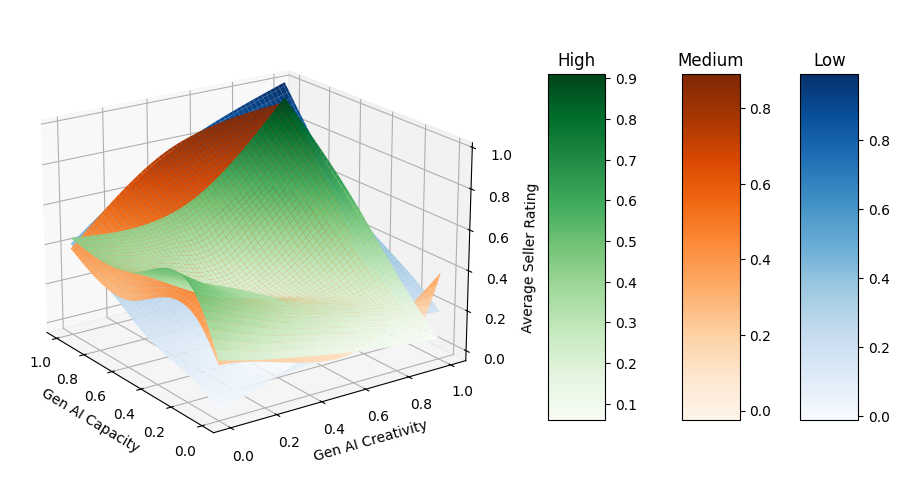

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import matplotlib.lines as mlines

fig = plt.figure(figsize=(12, 9)) 
ax = fig.add_subplot(111, projection='3d')

cmaps = ['Blues', 'Oranges', 'Greens']  # Different color maps for each category
rates = ['Learning Rate Low', 'Learning Rate Medium', 'Learning Rate High']  # Learning rate conditions

for i, rate in enumerate(rates):
    # Filtering data based on the learning rate
    subset = data[data[rate] == 1]

    # Extracting data for the axes
    x = subset['gen_ai_capacity']
    y = subset['gen_ai_creativity']
    z = subset['avg_rating']

    # Creating a grid to interpolate
    xi = np.linspace(x.min(), x.max(), 100)
    yi = np.linspace(y.min(), y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((x, y), z, (xi, yi), method='cubic')

    # Plotting the surface for each subset
    surf = ax.plot_surface(xi, yi, zi, cmap=cmaps[i], edgecolor='none')

    # Adding a color bar for each surface and setting a title for it
    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=6, pad=0.05*i)
    cbar.ax.set_title(rate.split()[2])  # Set title for each color bar

ax.view_init(elev=20, azim=-35)

# Setting labels for each axis
ax.set_xlabel('Gen AI Capacity')
ax.set_ylabel('Gen AI Creativity')
ax.set_zlabel('Average Seller Rating')

# Inverting X axes
ax.set_xlim(ax.get_xlim()[::-1])

plt.show()

# Independent Effects of Learning Rate

In [23]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


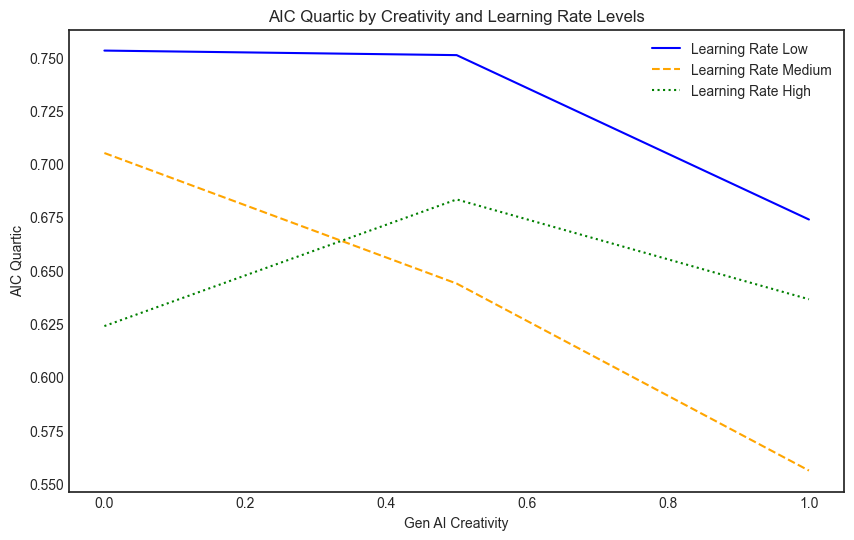

In [24]:
import matplotlib.pyplot as plt

# Set the plotting style
plt.style.use('seaborn-v0_8-white')

line_styles = ['-', '--', ':']

# Create a new figure for plotting
plt.figure(figsize=(10, 6))

# Plot a line for each learning rate level
for rate_level, color, style in zip(['Learning Rate Low', 'Learning Rate Medium', 'Learning Rate High'], ['blue', 'orange', 'green'], line_styles):
    # Filter data for the corresponding learning rate level
    subset = data[data[rate_level] == 1]

    # Calculate the average AIC for each level of creativity_gen_ai
    average_aic = subset.groupby('gen_ai_creativity')['aic_quartic_min'].mean()

    # Plot the line
    plt.plot(average_aic.index, average_aic.values, label=rate_level, color=color, linestyle=style)

# Add title and axis labels
plt.title('AIC Quartic by Creativity and Learning Rate Levels')
plt.xlabel('Gen AI Creativity')
plt.ylabel('AIC Quartic')

# Add a legend
plt.legend()

# Display the plot
plt.show()

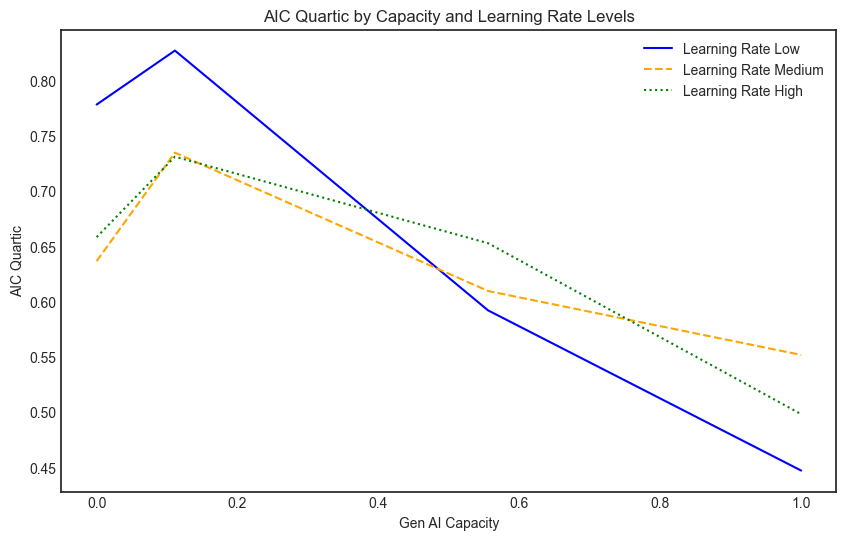

In [25]:
import matplotlib.pyplot as plt

# Set the plotting style
plt.style.use('seaborn-v0_8-white')

line_styles = ['-', '--', ':']

# Create a new figure for plotting
plt.figure(figsize=(10, 6))

# Plot a line for each learning rate level
for rate_level, color, style in zip(['Learning Rate Low', 'Learning Rate Medium', 'Learning Rate High'], ['blue', 'orange', 'green'], line_styles):
    # Filter data for the corresponding learning rate level
    subset = data[data[rate_level] == 1]

    # Calculate the average AIC for each level of capacity_gen_ai
    average_aic = subset.groupby('gen_ai_capacity')['aic_quartic_min'].mean()

    # Plot the line
    plt.plot(average_aic.index, average_aic.values, label=rate_level, color=color, linestyle=style)

# Add title and axis labels
plt.title('AIC Quartic by Capacity and Learning Rate Levels')
plt.xlabel('Gen AI Capacity')
plt.ylabel('AIC Quartic')

# Add a legend
plt.legend()

# Display the plot
plt.show()

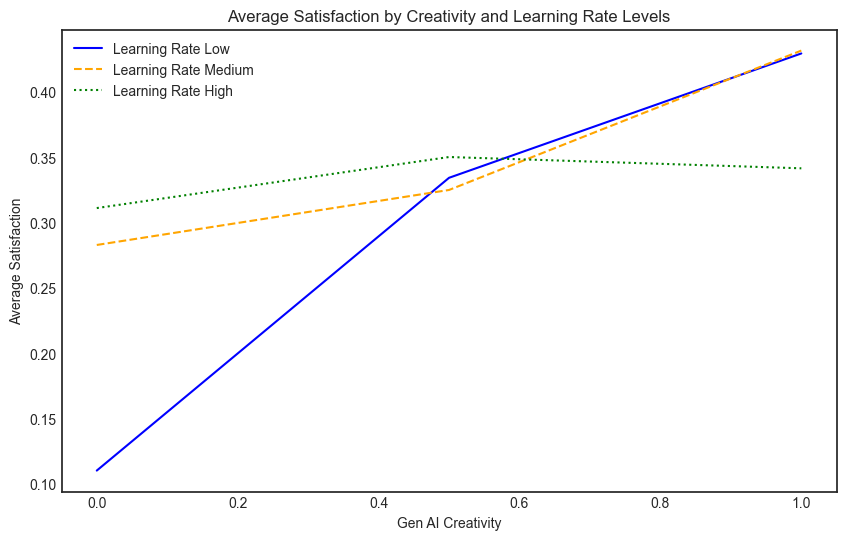

In [26]:
# Set the plotting style
plt.style.use('seaborn-v0_8-white')

# Create a new figure for plotting
plt.figure(figsize=(10, 6))

# Define line styles for different learning rate levels
line_styles = ['-', '--', ':']

# Plot a line for each learning rate level
for rate_level, color, style in zip(['Learning Rate Low', 'Learning Rate Medium', 'Learning Rate High'], ['blue', 'orange', 'green'], line_styles):
    # Filter data for the corresponding learning rate level
    subset = data[data[rate_level] == 1]

    # Calculate the average satisfaction for each level of creativity_gen_ai
    average_satisfaction = subset.groupby('gen_ai_creativity')['avg_satisfaction'].mean()

    # Plot the line with different styles
    plt.plot(average_satisfaction.index, average_satisfaction.values, label=rate_level, color=color, linestyle=style)

# Add title and axis labels
plt.title('Average Satisfaction by Creativity and Learning Rate Levels')
plt.xlabel('Gen AI Creativity')
plt.ylabel('Average Satisfaction')

# Add a legend
plt.legend()

# Display the plot
plt.show()


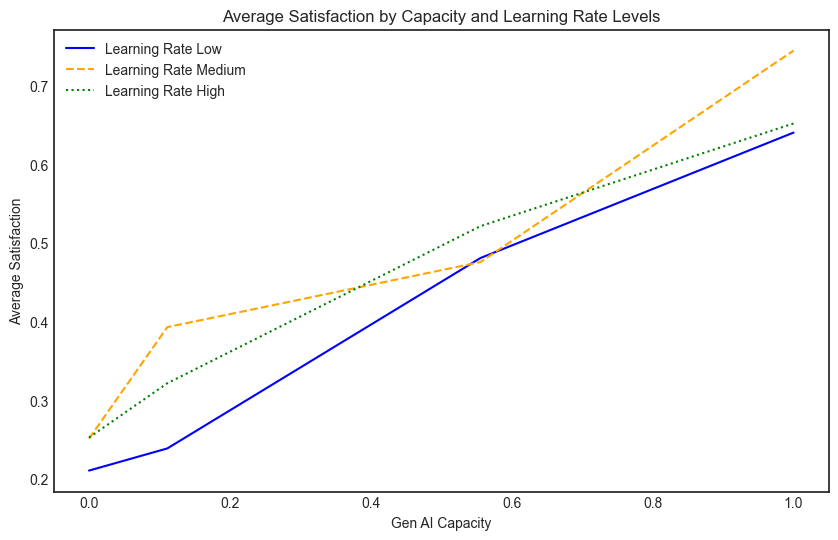

In [27]:
# Set the plotting style
plt.style.use('seaborn-v0_8-white')

# Create a new figure for plotting
plt.figure(figsize=(10, 6))

# Define line styles for different learning rate levels
line_styles = ['-', '--', ':']

# Plot a line for each learning rate level
for rate_level, color, style in zip(['Learning Rate Low', 'Learning Rate Medium', 'Learning Rate High'], ['blue', 'orange', 'green'], line_styles):
    # Filter data for the corresponding learning rate level
    subset = data[data[rate_level] == 1]

    # Calculate the average AIC for each level of capacity_gen_ai
    average_satisfaction = subset.groupby('gen_ai_capacity')['avg_satisfaction'].mean()

    # Plot the line with different styles
    plt.plot(average_satisfaction.index, average_satisfaction.values, label=rate_level, color=color, linestyle=style)

# Add title and axis labels
plt.title('Average Satisfaction by Capacity and Learning Rate Levels')
plt.xlabel('Gen AI Capacity')
plt.ylabel('Average Satisfaction')

# Add a legend
plt.legend()

# Display the plot
plt.show()

# Independent Effects of Creativity

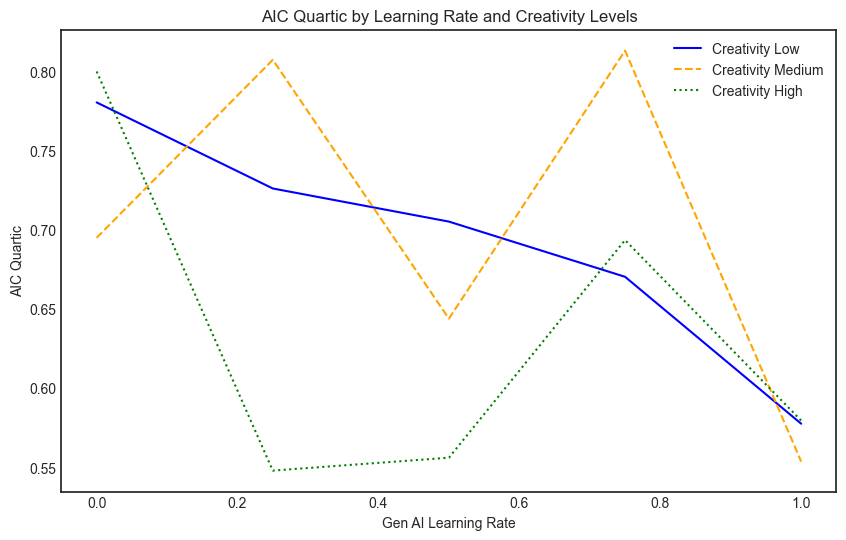

In [28]:
# Set the plotting style
plt.style.use('seaborn-v0_8-white')

# Create a new figure for plotting
plt.figure(figsize=(10, 6))

# Define line styles for different learning rate levels
line_styles = ['-', '--', ':']

# Plot a line for each creativity_gen_ai level
for creativity_level, color, style in zip(['Creativity Low', 'Creativity Medium', 'Creativity High'], ['blue', 'orange', 'green'], line_styles):
    # Filter data for the corresponding creativity_gen_ai level
    subset = data[data[creativity_level] == 1]

    # Calculate the average AIC for each level of gen_ai_learning_rate
    average_aic = subset.groupby('gen_ai_learning_rate')['aic_quartic_min'].mean()

    # Plot the line
    plt.plot(average_aic.index, average_aic.values, label=creativity_level, color=color, linestyle=style)

# Add title and axis labels
plt.title('AIC Quartic by Learning Rate and Creativity Levels')
plt.xlabel('Gen AI Learning Rate')
plt.ylabel('AIC Quartic')

# Add a legend
plt.legend()

# Display the plot
plt.show()


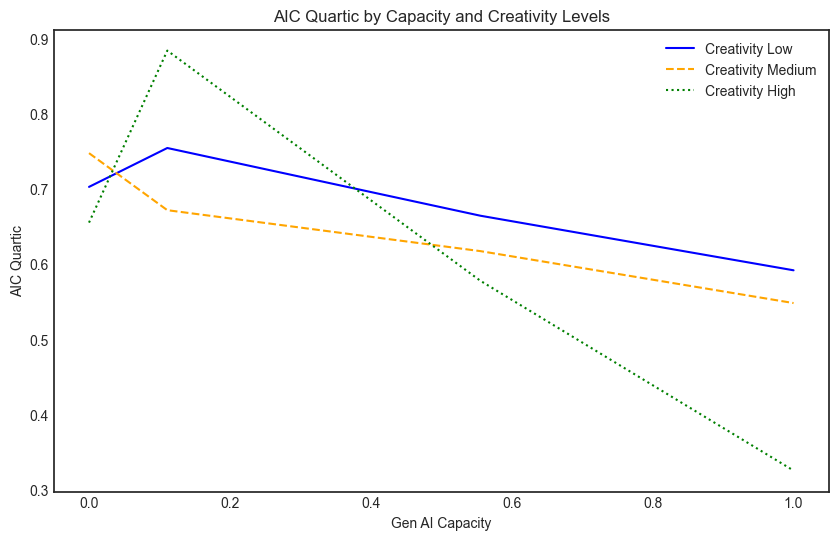

In [29]:
# Set the plotting style
plt.style.use('seaborn-v0_8-white')

# Create a new figure for plotting
plt.figure(figsize=(10, 6))

# Define line styles for different learning rate levels
line_styles = ['-', '--', ':']

# Plot a line for each creativity_gen_ai level
for creativity_level, color, style in zip(['Creativity Low', 'Creativity Medium', 'Creativity High'], ['blue', 'orange', 'green'], line_styles):
    # Filter data for the corresponding creativity_gen_ai level
    subset = data[data[creativity_level] == 1]

    # Calculate the average AIC for each level of gen_ai_capacity
    average_aic = subset.groupby('gen_ai_capacity')['aic_quartic_min'].mean()

    # Plot the line
    plt.plot(average_aic.index, average_aic.values, label=creativity_level, color=color, linestyle=style)

# Add title and axis labels
plt.title('AIC Quartic by Capacity and Creativity Levels')
plt.xlabel('Gen AI Capacity')
plt.ylabel('AIC Quartic')

# Add a legend
plt.legend()

# Display the plot
plt.show()

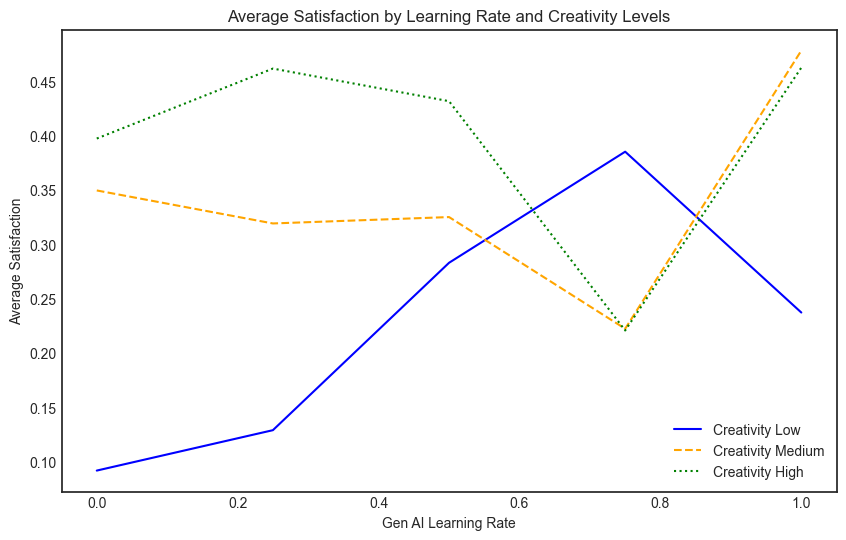

In [30]:
# Set the plotting style
plt.style.use('seaborn-v0_8-white')

# Create a new figure for plotting
plt.figure(figsize=(10, 6))

# Define line styles for different learning rate levels
line_styles = ['-', '--', ':']

# Plot a line for each creativity_gen_ai level
for creativity_level, color, style in zip(['Creativity Low', 'Creativity Medium', 'Creativity High'], ['blue', 'orange', 'green'], line_styles):
    # Filter data for the corresponding creativity_gen_ai level
    subset = data[data[creativity_level] == 1]

    # Calculate the average AIC for each level of gen_ai_learning_rate
    average_aic = subset.groupby('gen_ai_learning_rate')['avg_satisfaction'].mean()

    # Plot the line
    plt.plot(average_aic.index, average_aic.values, label=creativity_level, color=color, linestyle=style)

# Add title and axis labels
plt.title('Average Satisfaction by Learning Rate and Creativity Levels')
plt.xlabel('Gen AI Learning Rate')
plt.ylabel('Average Satisfaction')

# Add a legend
plt.legend()

# Display the plot
plt.show()


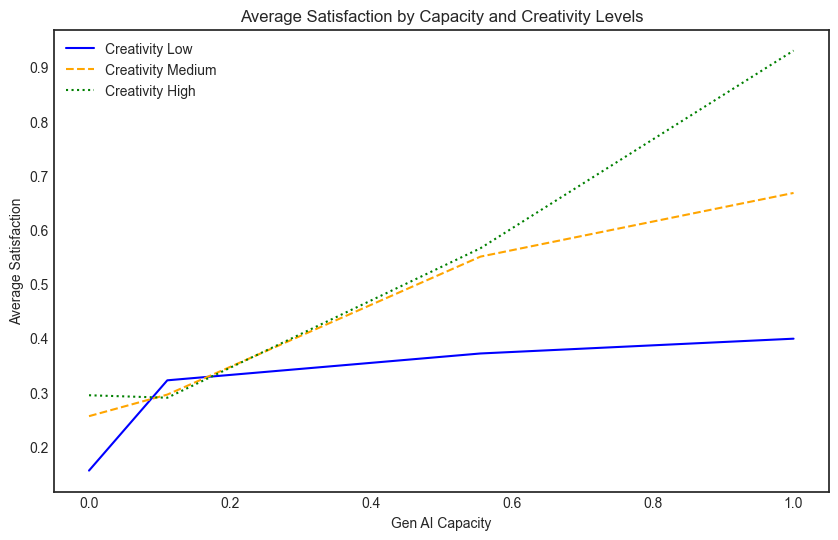

In [31]:
# Set the plotting style
plt.style.use('seaborn-v0_8-white')

# Create a new figure for plotting
plt.figure(figsize=(10, 6))

# Define line styles for different learning rate levels
line_styles = ['-', '--', ':']

# Plot a line for each creativity_gen_ai level
for creativity_level, color, style in zip(['Creativity Low', 'Creativity Medium', 'Creativity High'], ['blue', 'orange', 'green'], line_styles):
    # Filter data for the corresponding creativity_gen_ai level
    subset = data[data[creativity_level] == 1]

    # Calculate the average AIC for each level of gen_ai_capacity
    average_aic = subset.groupby('gen_ai_capacity')['avg_satisfaction'].mean()

    # Plot the line
    plt.plot(average_aic.index, average_aic.values, label=creativity_level, color=color, linestyle=style)

# Add title and axis labels
plt.title('Average Satisfaction by Capacity and Creativity Levels')
plt.xlabel('Gen AI Capacity')
plt.ylabel('Average Satisfaction')

# Add a legend
plt.legend()

# Display the plot
plt.show()

# Independent Effects of Capacity

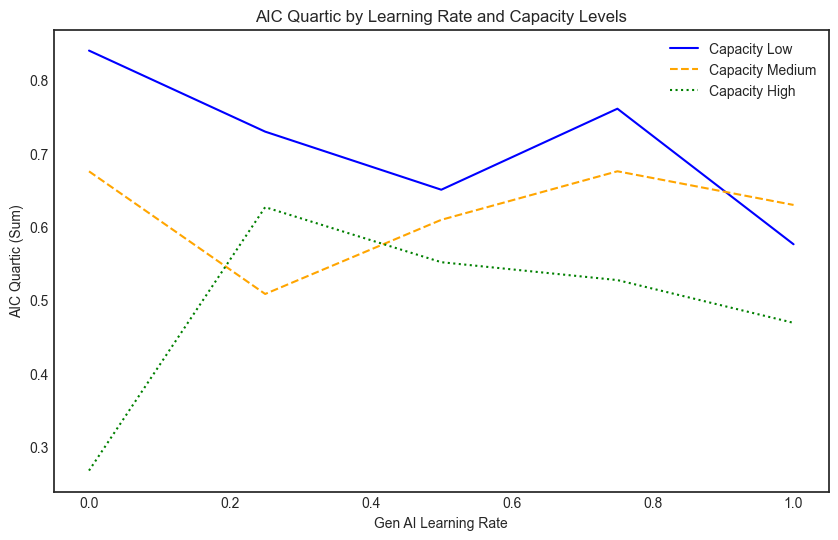

In [32]:
# Set the plotting style
plt.style.use('seaborn-v0_8-white')

# Create a new figure for plotting
plt.figure(figsize=(10, 6))

# Define line styles for different learning rate levels
line_styles = ['-', '--', ':']

# Plot a line for each creativity_gen_ai level
for creativity_level, color, style in zip(['Capacity Low', 'Capacity Medium', 'Capacity High'], ['blue', 'orange', 'green'], line_styles):
    # Filter data for the corresponding creativity_gen_ai level
    subset = data[data[creativity_level] == 1]

    # Calculate the average AIC for each level of gen_ai_learning_rate
    average_aic = subset.groupby('gen_ai_learning_rate')['aic_quartic_min'].mean()

    # Plot the line
    plt.plot(average_aic.index, average_aic.values, label=creativity_level, color=color, linestyle=style)

# Add title and axis labels
plt.title('AIC Quartic by Learning Rate and Capacity Levels')
plt.xlabel('Gen AI Learning Rate')
plt.ylabel('AIC Quartic (Sum)')

# Add a legend
plt.legend()

# Display the plot
plt.show()

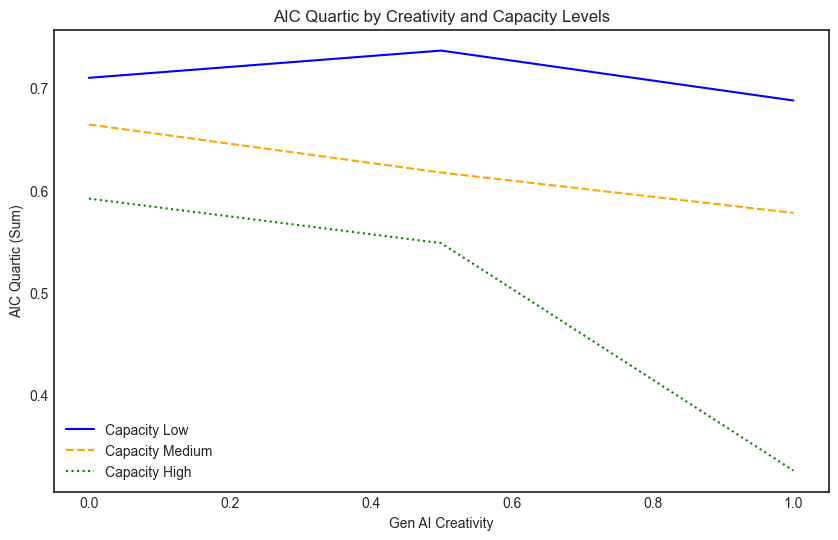

In [33]:
# Set the plotting style
plt.style.use('seaborn-v0_8-white')

# Create a new figure for plotting
plt.figure(figsize=(10, 6))

# Define line styles for different learning rate levels
line_styles = ['-', '--', ':']

# Plot a line for each creativity_gen_ai level
for creativity_level, color, style in zip(['Capacity Low', 'Capacity Medium', 'Capacity High'], ['blue', 'orange', 'green'], line_styles):
    # Filter data for the corresponding creativity_gen_ai level
    subset = data[data[creativity_level] == 1]

    # Calculate the average AIC for each level of gen_ai_creativity
    average_aic = subset.groupby('gen_ai_creativity')['aic_quartic_min'].mean()

    # Plot the line
    plt.plot(average_aic.index, average_aic.values, label=creativity_level, color=color, linestyle=style)

# Add title and axis labels
plt.title('AIC Quartic by Creativity and Capacity Levels')
plt.xlabel('Gen AI Creativity')
plt.ylabel('AIC Quartic (Sum)')

# Add a legend
plt.legend()

# Display the plot
plt.show()

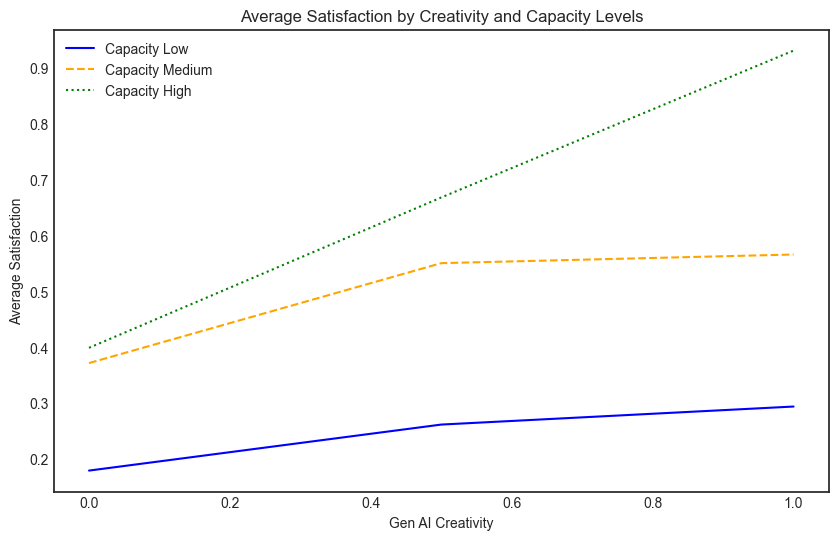

In [34]:
# Set the plotting style
plt.style.use('seaborn-v0_8-white')

# Create a new figure for plotting
plt.figure(figsize=(10, 6))

# Define line styles for different learning rate levels
line_styles = ['-', '--', ':']

# Plot a line for each creativity_gen_ai level
for creativity_level, color, style in zip(['Capacity Low', 'Capacity Medium', 'Capacity High'], ['blue', 'orange', 'green'], line_styles):
    # Filter data for the corresponding creativity_gen_ai level
    subset = data[data[creativity_level] == 1]

    # Calculate the average AIC for each level of gen_ai_creativity
    average_aic = subset.groupby('gen_ai_creativity')['avg_satisfaction'].mean()

    # Plot the line
    plt.plot(average_aic.index, average_aic.values, label=creativity_level, color=color, linestyle=style)

# Add title and axis labels
plt.title('Average Satisfaction by Creativity and Capacity Levels')
plt.xlabel('Gen AI Creativity')
plt.ylabel('Average Satisfaction')

# Add a legend
plt.legend()

# Display the plot
plt.show()

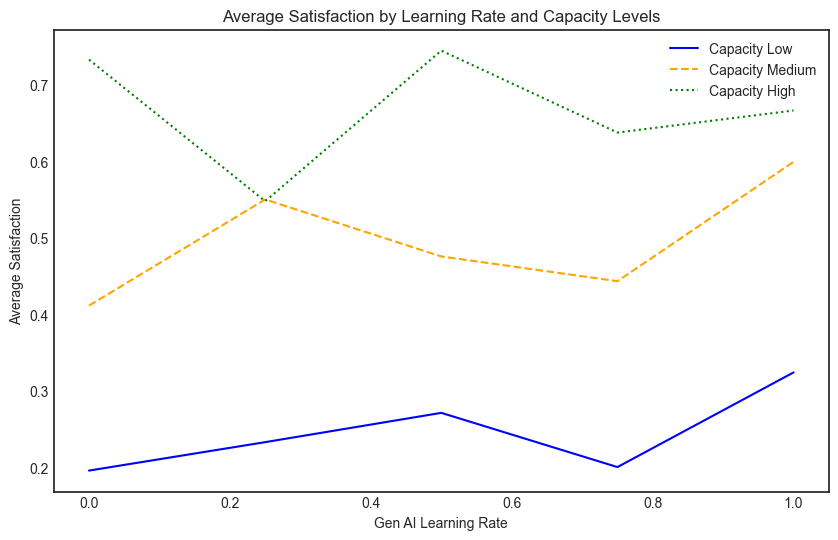

In [35]:
# Set the plotting style
plt.style.use('seaborn-v0_8-white')

# Create a new figure for plotting
plt.figure(figsize=(10, 6))

# Define line styles for different learning rate levels
line_styles = ['-', '--', ':']

# Plot a line for each creativity_gen_ai level
for creativity_level, color, style in zip(['Capacity Low', 'Capacity Medium', 'Capacity High'], ['blue', 'orange', 'green'], line_styles):
    # Filter data for the corresponding creativity_gen_ai level
    subset = data[data[creativity_level] == 1]

    # Calculate the average AIC for each level of gen_ai_learning_rate
    average_aic = subset.groupby('gen_ai_learning_rate')['avg_satisfaction'].mean()

    # Plot the line
    plt.plot(average_aic.index, average_aic.values, label=creativity_level, color=color, linestyle=style)

# Add title and axis labels
plt.title('Average Satisfaction by Learning Rate and Capacity Levels')
plt.xlabel('Gen AI Learning Rate')
plt.ylabel('Average Satisfaction')

# Add a legend
plt.legend()

# Display the plot
plt.show()